In [9]:
import geopandas

In [10]:
def state_urls(state_name):
    state_name = state_name.replace(' ', '+')
    counties_url = f'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0/query?where=STATE_NAME%3D%27{state_name}%27&outFields=*&returnGeometry=true&f=pgeojson'

    cases_url = f'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0/query?where=Province_State%3D%27{state_name}%27&outFields=*&returnGeometry=true&f=pgeojson'

    return {
        'counties_url': counties_url,
        'cases_url': cases_url
    }

In [11]:
def plot_state(state_name, column):
    urls = state_urls(state_name)
    cases = geopandas.read_file(urls['cases_url'])[['Confirmed', 'Recovered', 'Deaths', 'Active', 'FIPS']]
    counties = geopandas.read_file(urls['counties_url']).to_crs('EPSG:2163')
    county_cases = counties.merge(cases, on='FIPS')
    return county_cases.plot(column=column, cmap='RdYlGn_r', edgecolor='black', scheme='percentiles', figsize=(25,25), legend='True')

In [12]:
def plot_us(column):
    ncov_cases_us_url = 'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'
    usa_states_generalized_url = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/USA_States_Generalized/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson'
    cases = geopandas.read_file(ncov_cases_us_url).cx[-120:-15, :].to_crs('EPSG:2163')
    cases.sort_values(by=column, ascending=False, inplace=True)
    states = geopandas.read_file(usa_states_generalized_url).cx[-120:-15, :].to_crs('EPSG:2163')
    base = states.plot(color='white', edgecolor='black', figsize=(25,25))
    return cases.plot(ax=base, column=column, cmap='RdYlGn_r', scheme='percentiles', alpha=0.75, markersize=cases[column], figsize=(25,25), legend='True')

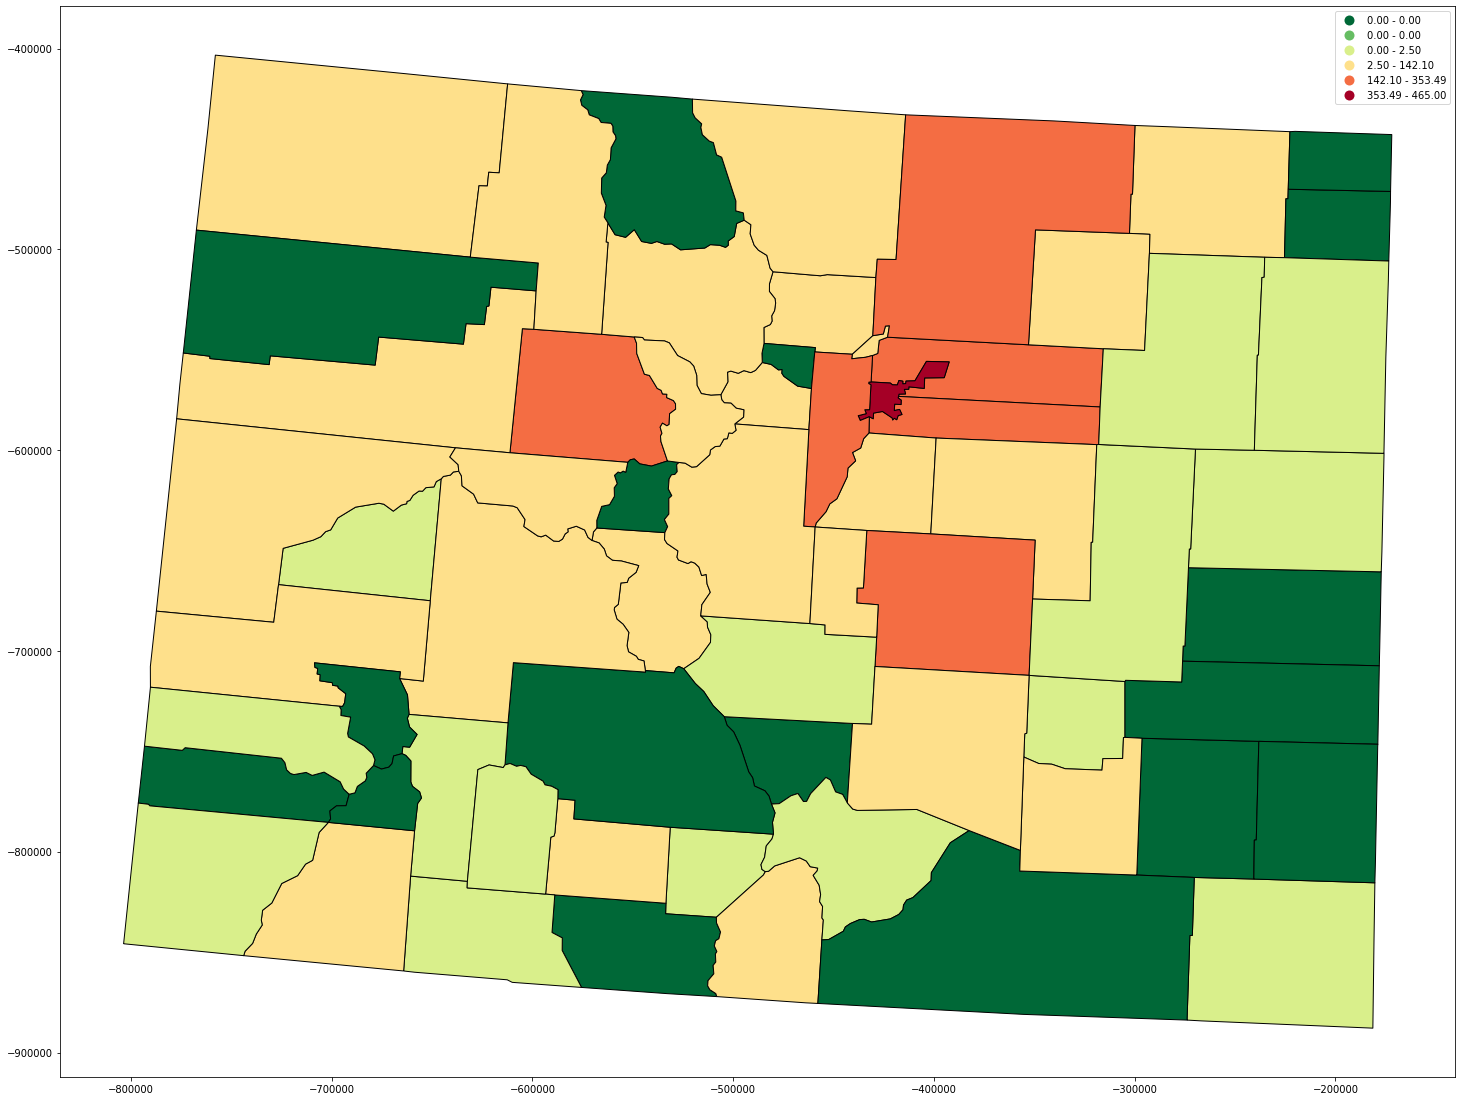

In [13]:
plot_state('Colorado', 'Confirmed')

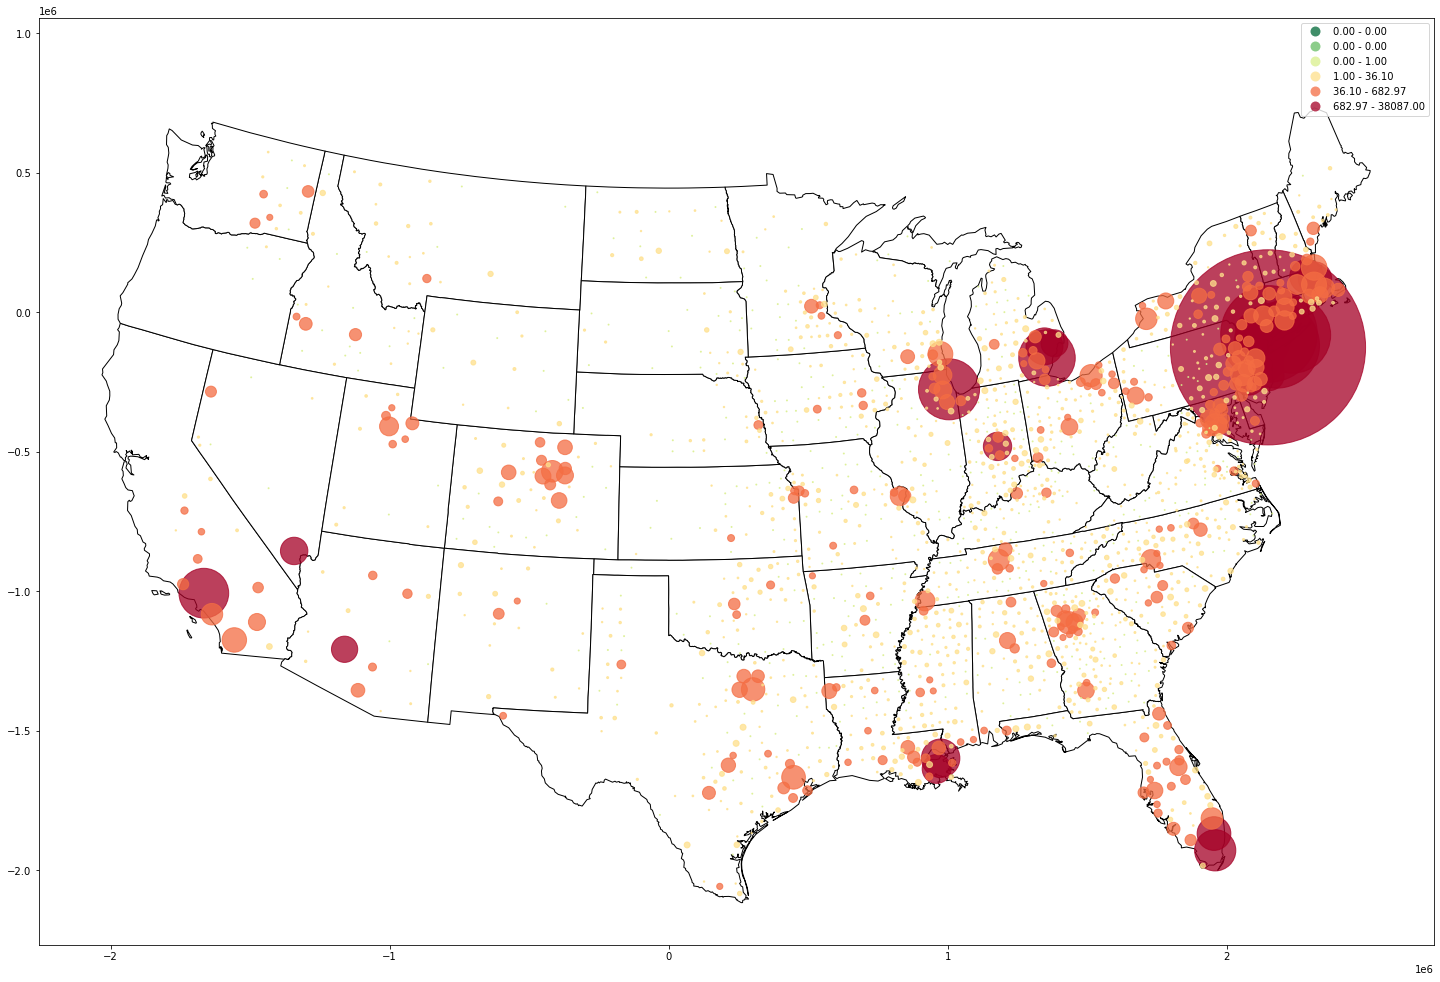

In [14]:
plot_us('Confirmed')